# Small Example for the Euler equations and how to use it 

We have the forwad facing step where the initial state $(\rho, u, v, p) = (1.4, 3,0,1)$

The geometry is :

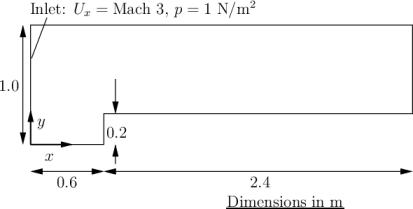

In [1]:
import jax.numpy as jnp
import sys
import time

sys.path.append('../..')  
from FVM.src.mesh.mesh import Mesh
from FVM.src.mesh import Mesh_cases
from FVM.src.Cases import Test_Cases
from FVM.src.solvers.Euler import Euler 
import FVM.src.solvers.Euler.helper as Euler_helper 


time: 0 / 18999
time: 100 / 18999
time: 200 / 18999
time: 300 / 18999
time: 400 / 18999
time: 500 / 18999
time: 600 / 18999
time: 700 / 18999
time: 800 / 18999
time: 900 / 18999
time: 1000 / 18999
time: 1100 / 18999
time: 1200 / 18999
time: 1300 / 18999
time: 1400 / 18999
time: 1500 / 18999
time: 1600 / 18999
time: 1700 / 18999
time: 1800 / 18999
time: 1900 / 18999
time: 2000 / 18999
time: 2100 / 18999
time: 2200 / 18999
time: 2300 / 18999
time: 2400 / 18999
time: 2500 / 18999
time: 2600 / 18999
time: 2700 / 18999
time: 2800 / 18999
time: 2900 / 18999
time: 3000 / 18999
time: 3100 / 18999
time: 3200 / 18999
time: 3300 / 18999
time: 3400 / 18999
time: 3500 / 18999
time: 3600 / 18999
time: 3700 / 18999
time: 3800 / 18999
time: 3900 / 18999
time: 4000 / 18999
time: 4100 / 18999
time: 4200 / 18999
time: 4300 / 18999
time: 4400 / 18999
time: 4500 / 18999
time: 4600 / 18999
time: 4700 / 18999
time: 4800 / 18999
time: 4900 / 18999
time: 5000 / 18999
time: 5100 / 18999
time: 5200 / 18999
time:

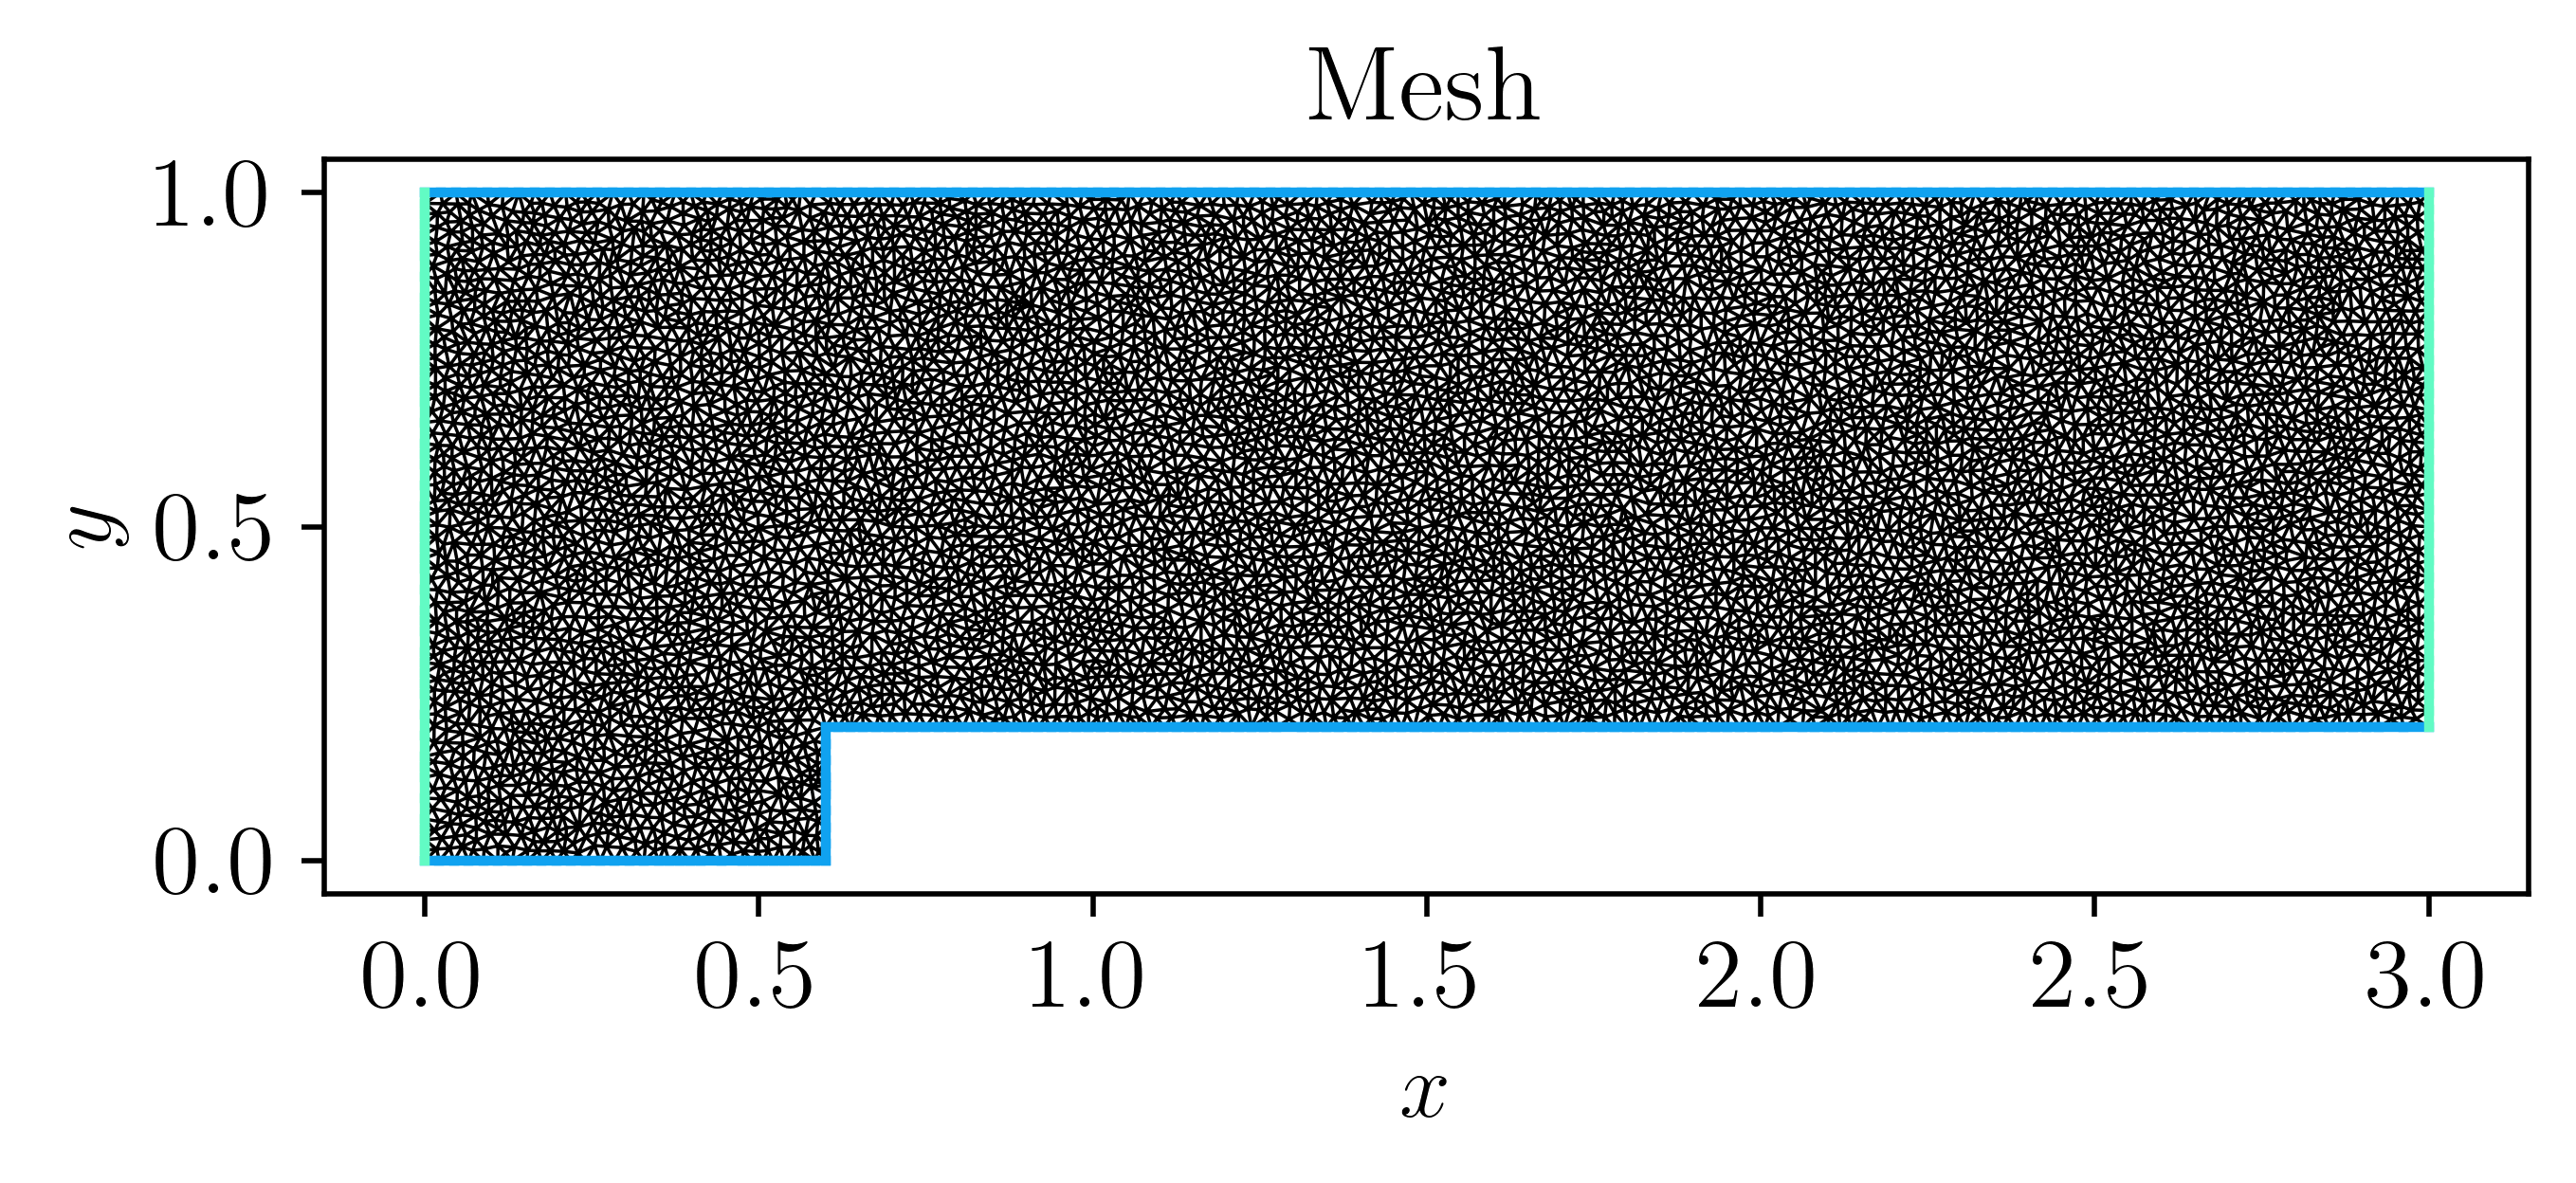

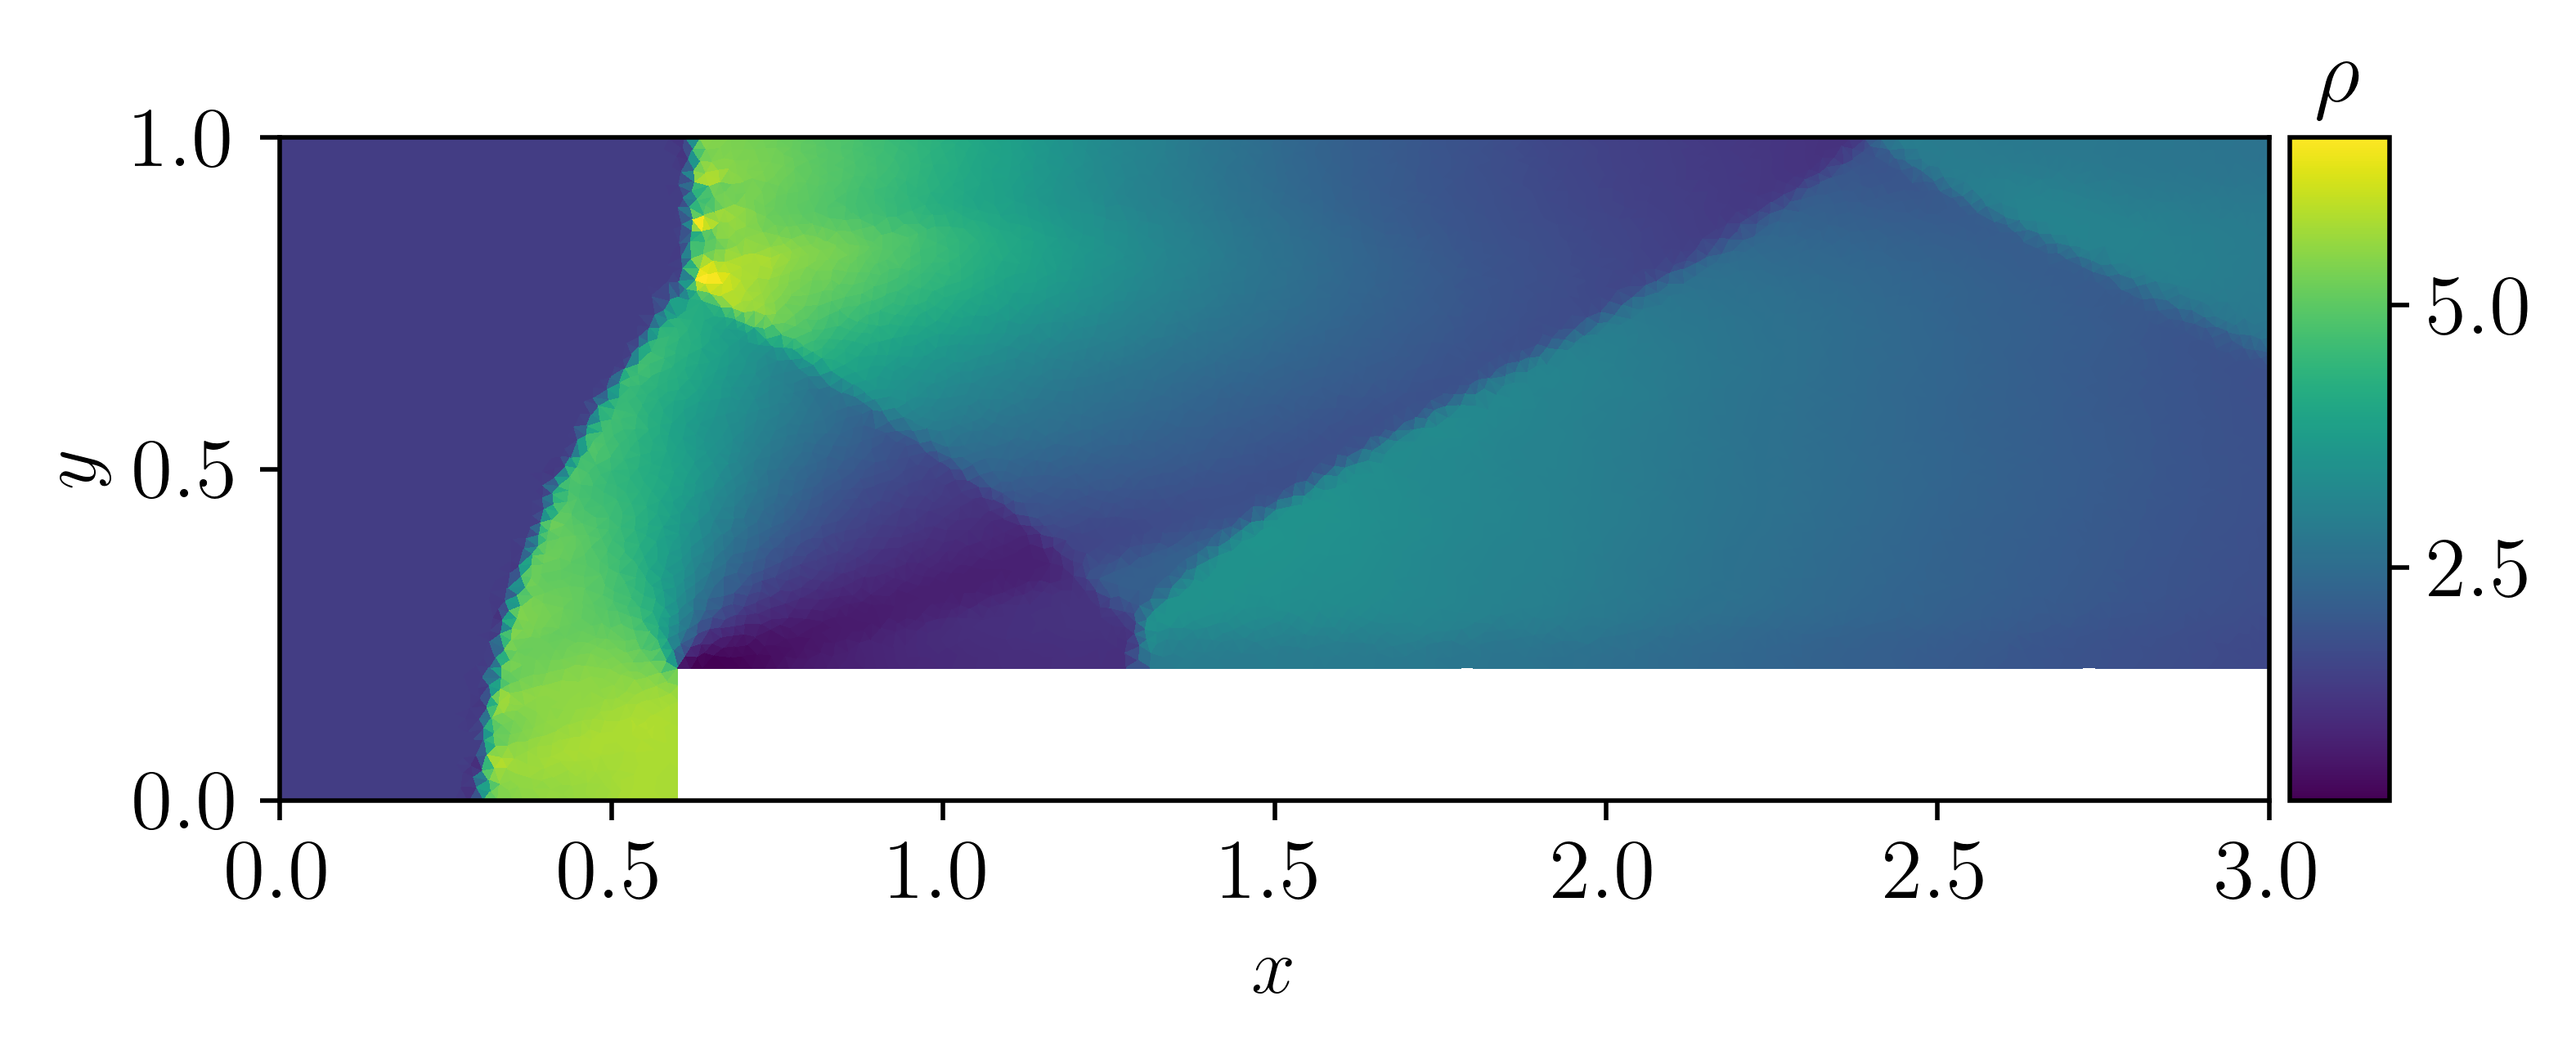

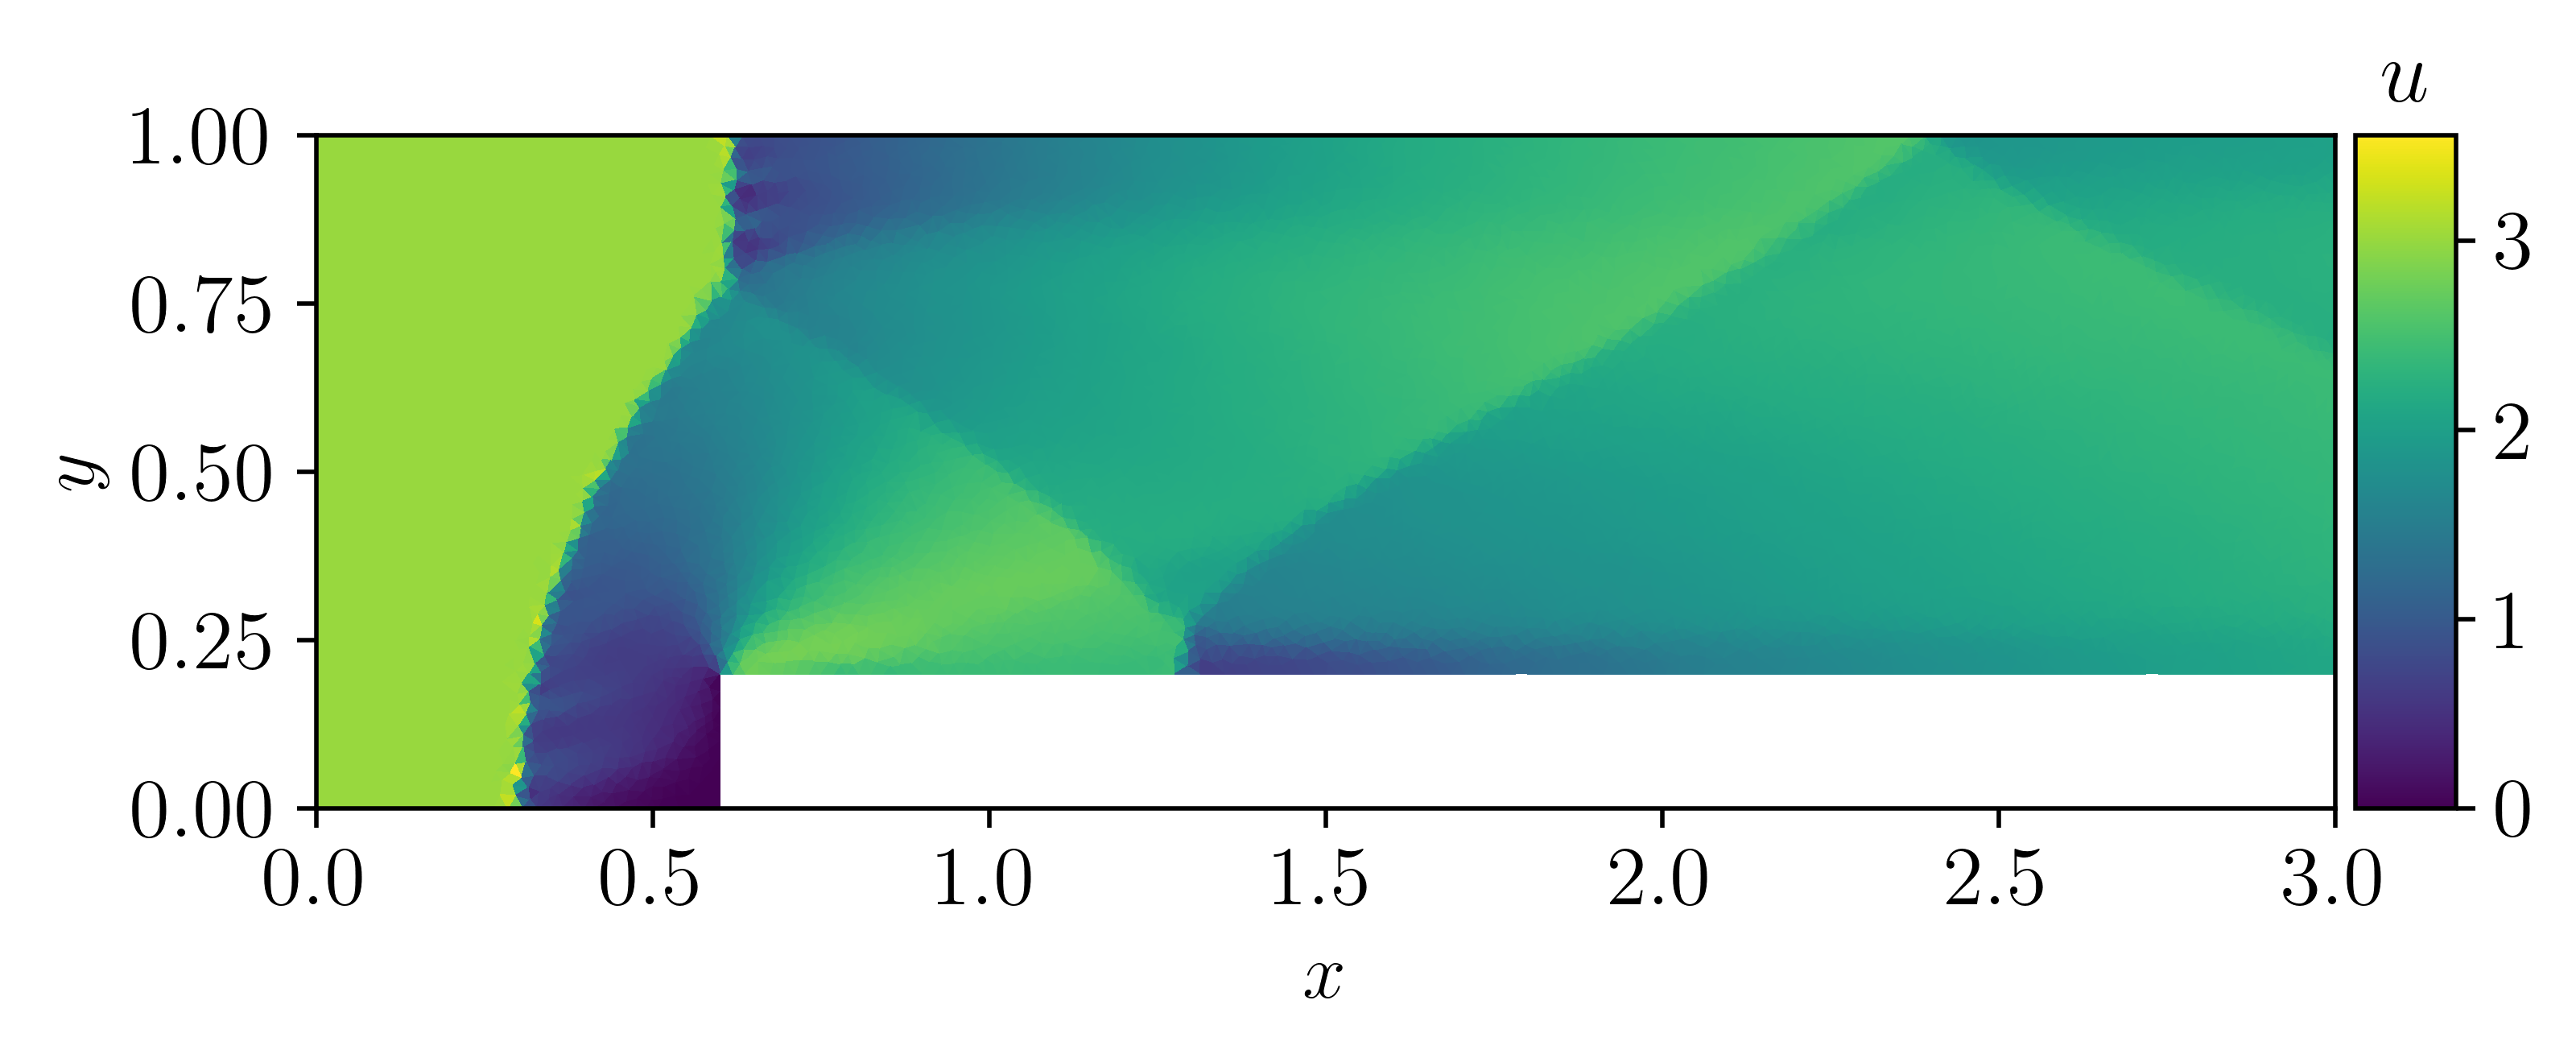

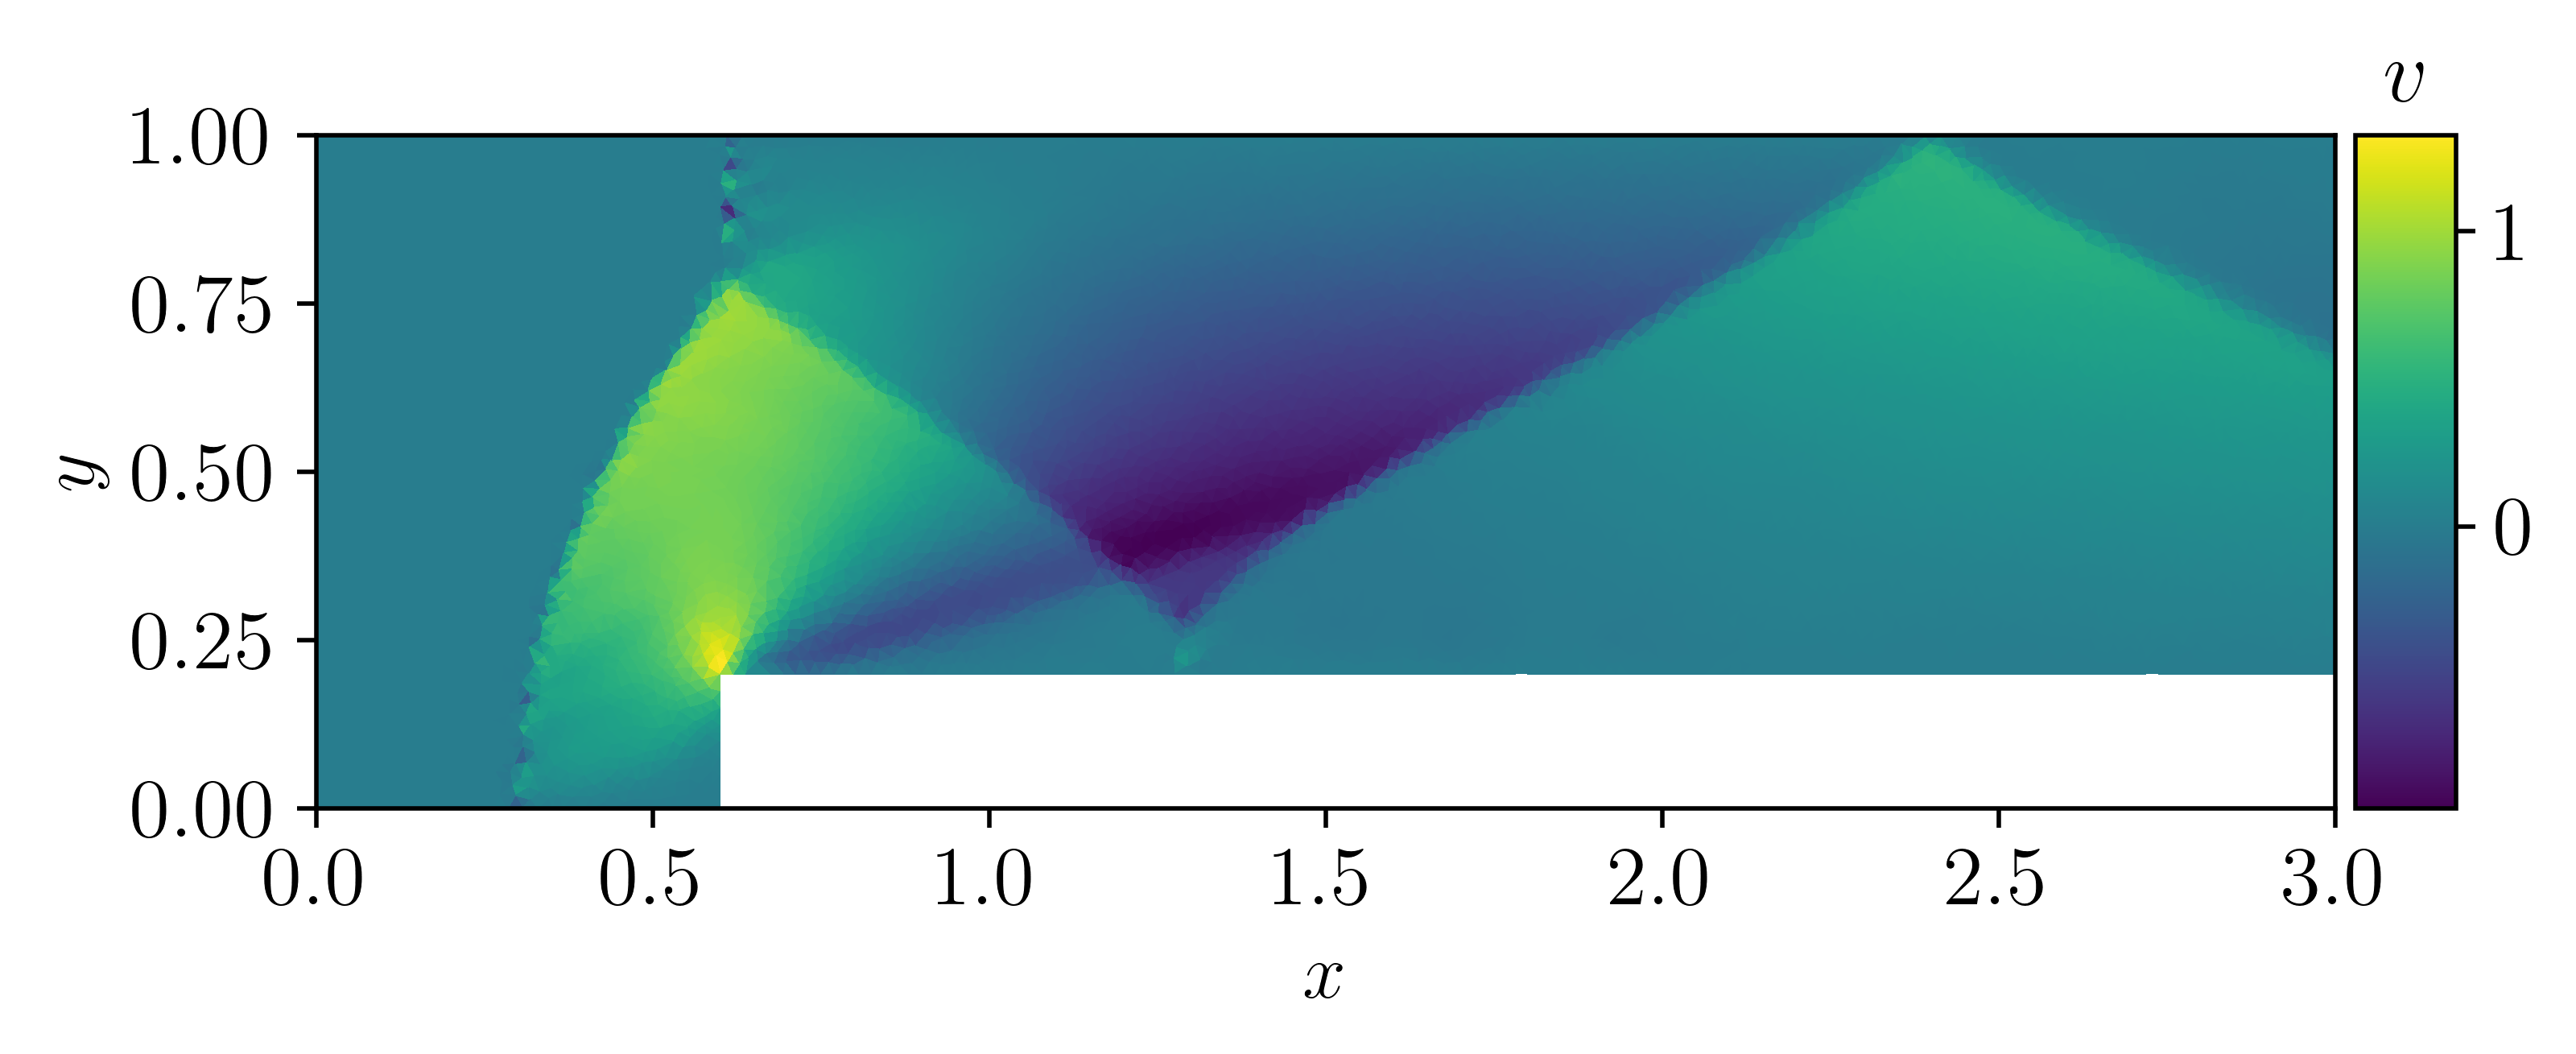

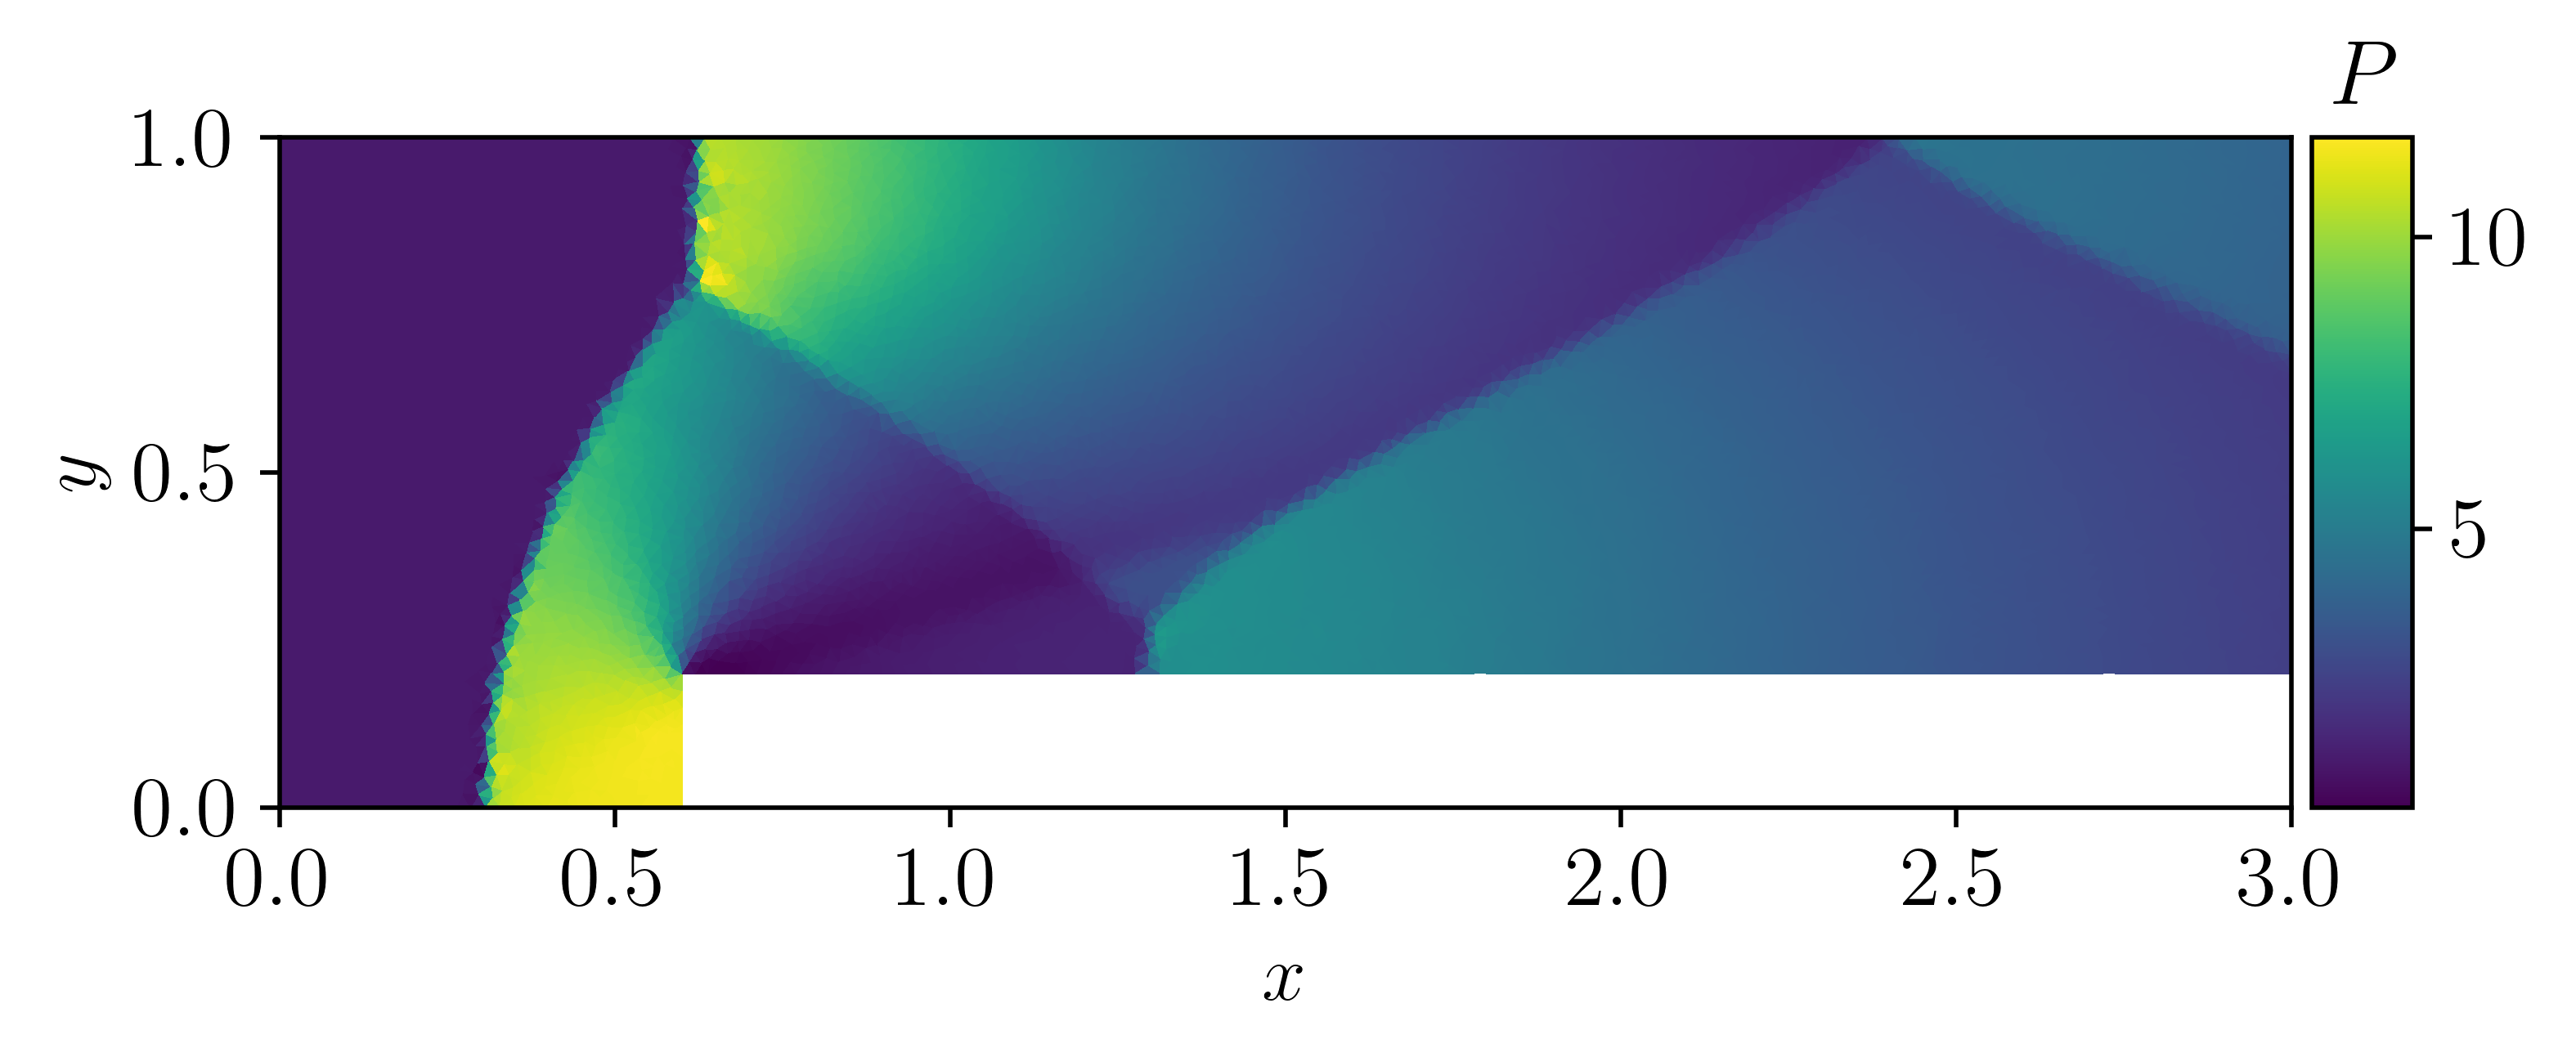

In [2]:
# little test case: Forward facing step
mesh = Mesh_cases.Forward_Step().build(h = 2.5e-4)
# mesh.mesh_generator(maxV=2e-4, marker_boundary=2)


# Initial condition
Primitives = Test_Cases.ForwardFacingStep().build(mesh)
W = Euler_helper.getConserved(Primitives)

mesh.plot_mesh()

# Time loop
t_final = 4.
CFL = 0.1
dx_min = jnp.min(jnp.sqrt(mesh.area))
dt = CFL * dx_min / jnp.max(jnp.sqrt(Primitives[...,1]**2 + Primitives[...,2]**2)) 
N_t = int(t_final / dt) + 1

start_time = time.time()
for n in range(N_t):
    W = Euler.time_step(W, mesh, dt)
    if n % 100 == 0:
        print(f'time: {n} / {N_t}')
print(f'Simulation time: {time.time() - start_time} seconds')

# Plot solution
Primitives = Euler_helper.getPrimitive(W)
mesh.plot_solution(Primitives[...,0], labels = r'$\rho$')
mesh.plot_solution(Primitives[...,1], labels = r'$u$')
mesh.plot_solution(Primitives[...,2], labels = r'$v$')
mesh.plot_solution(Primitives[...,3], labels = r'$P$')